In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('data/weight-height.csv')
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [3]:
df.shape

(10000, 3)

In [4]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

C:\Users\malik\AppData\Local\Temp\ipykernel_14140\523841948.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height'])


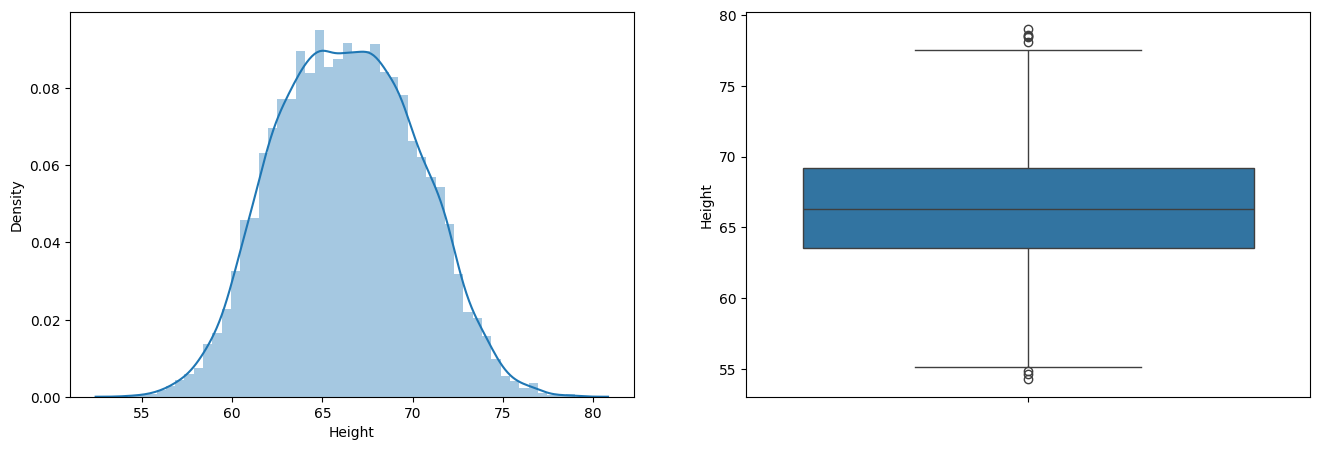

In [6]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['Height'])
plt.subplot(1,2,2)
sns.boxplot(df['Height'])
plt.show()

In [8]:
upper_limit=df['Height'].quantile(0.99)
lower_limit=df['Height'].quantile(0.01) 
lower_limit,upper_limit

(np.float64(58.13441158671655), np.float64(74.7857900583366))

In [12]:
df[(df['Height']<=lower_limit)|(df["Height"]>=upper_limit)]

,Gender,Height,Weight
23,Male,75.205974,228.761781
190,Male,76.709835,235.035419
197,Male,75.944460,231.924749
202,Male,75.140821,224.124271
215,Male,74.795375,232.635403
...,...,...,...
9761,Female,56.975279,90.341784
9825,Female,55.979198,85.417534
9895,Female,57.740192,93.652957
9904,Female,57.028857,101.202551


In [ ]:
new_df = df[(df['Height'] >= lower_limit) & (df["Height"] <= upper_limit)]
new_df.shape

(9800, 3)

In [15]:
new_df['Height'].describe()

count    9800.000000
mean       66.364366
std         3.645075
min        58.134496
25%        63.577162
50%        66.318070
75%        69.119896
max        74.785714
Name: Height, dtype: float64

C:\Users\malik\AppData\Local\Temp\ipykernel_14140\344512796.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['Height'])


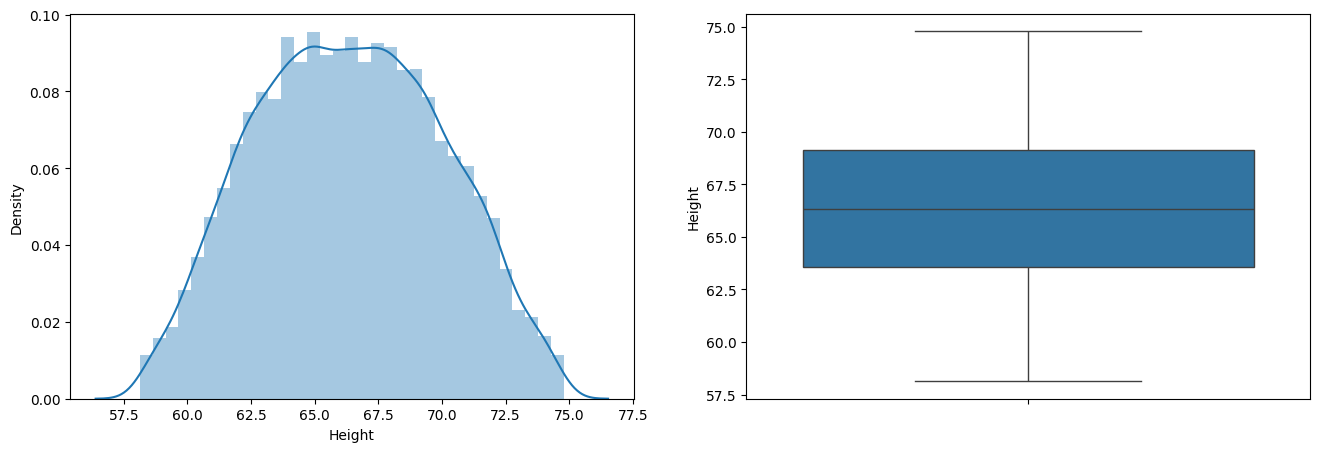

In [16]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(new_df['Height'])
plt.subplot(1,2,2)
sns.boxplot(new_df['Height'])
plt.show()

In [20]:
# Caping --- > Wensorization

new_df2=df.copy()
new_df2['Height']=np.where(
    df['Height']>upper_limit,
    upper_limit,
    np.where(
        df['Height']<lower_limit,
        lower_limit,
        df['Height']
    )
)

new_df2

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


C:\Users\malik\AppData\Local\Temp\ipykernel_14140\1955815398.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df2['Height'])


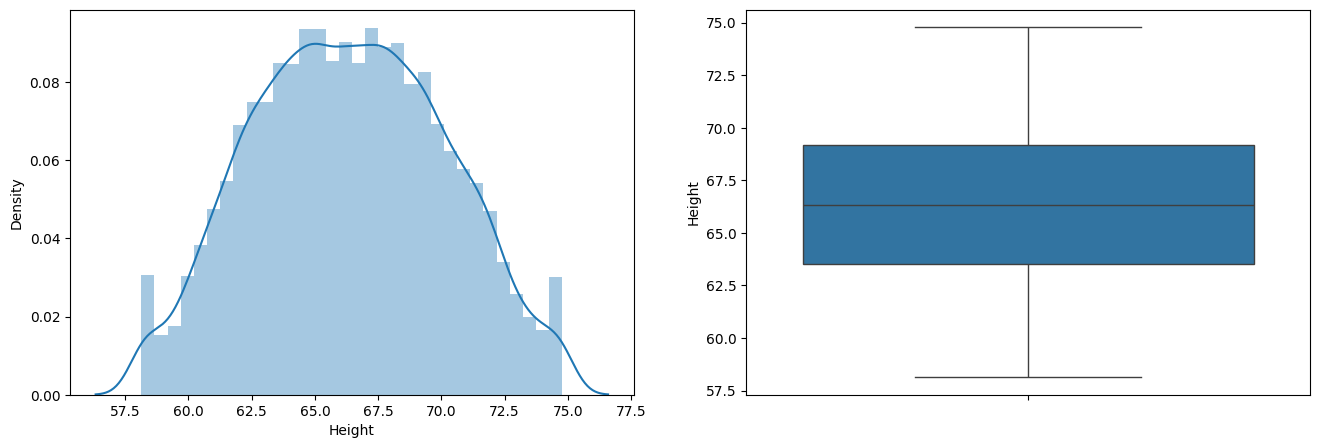

In [21]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(new_df2['Height'])
plt.subplot(1,2,2)
sns.boxplot(new_df2['Height'])
plt.show()